In [71]:
import pandas as pd # provide rows & columns for analysis
import numpy as np #  provide multidimensional array
import string
import pickle
import nltk
from matplotlib import pyplot as plt  # provide plotting of 2d graphs
%matplotlib inline

In [72]:
df = pd.read_csv('Facebook_news1.csv', index_col=[0])
df.head(50)

,Updated_Time,ABC News,Message,Comment_Count
Created_Time,,,,
2020-11-19T00:20:28+0000,2020-11-20T19:46:00+0000,ABC News,"""Thanks to poll workers, elections are possibl...",0
2020-11-19T15:43:05+0000,2020-11-20T19:30:57+0000,ABC News,#KarismaKapoor is revisiting throwback memorie...,3
2020-11-19T15:07:56+0000,2020-11-20T19:18:48+0000,ABC News,"""Beach/Birthday Baby,"" #TaraSutaria captioned ...",0
2020-11-19T14:53:36+0000,2020-11-20T19:08:30+0000,ABC News,"""Smell the sea, feel the sky, let your soul an...",8
2020-11-19T14:49:26+0000,2020-11-20T18:30:52+0000,ABC News,China has established a village 2 km within Bh...,10
2020-11-19T14:41:32+0000,2020-11-20T19:46:44+0000,ABC News,Shah Rukh Khan was spotted at a Mumbai studio ...,12
2020-11-19T14:30:43+0000,2020-11-20T18:49:51+0000,ABC News,The move is particularly worrying for India si...,10
2020-11-19T14:00:32+0000,2020-11-20T18:19:45+0000,ABC News,"""I always look forward to catching up with you...",0
2020-11-19T13:53:20+0000,2020-11-20T18:16:45+0000,ABC News,Hint: Not Saif Ali Khan (Image courtesy: Inst...,1


In [73]:
df.dropna()
df.reset_index(inplace=True)
df.head(50)

,Created_Time,Updated_Time,ABC News,Message,Comment_Count
0,2020-11-19T00:20:28+0000,2020-11-20T19:46:00+0000,ABC News,"""Thanks to poll workers, elections are possibl...",0
1,2020-11-19T15:43:05+0000,2020-11-20T19:30:57+0000,ABC News,#KarismaKapoor is revisiting throwback memorie...,3
2,2020-11-19T15:07:56+0000,2020-11-20T19:18:48+0000,ABC News,"""Beach/Birthday Baby,"" #TaraSutaria captioned ...",0
3,2020-11-19T14:53:36+0000,2020-11-20T19:08:30+0000,ABC News,"""Smell the sea, feel the sky, let your soul an...",8
4,2020-11-19T14:49:26+0000,2020-11-20T18:30:52+0000,ABC News,China has established a village 2 km within Bh...,10
5,2020-11-19T14:41:32+0000,2020-11-20T19:46:44+0000,ABC News,Shah Rukh Khan was spotted at a Mumbai studio ...,12
6,2020-11-19T14:30:43+0000,2020-11-20T18:49:51+0000,ABC News,The move is particularly worrying for India si...,10
7,2020-11-19T14:00:32+0000,2020-11-20T18:19:45+0000,ABC News,"""I always look forward to catching up with you...",0
8,2020-11-19T13:53:20+0000,2020-11-20T18:16:45+0000,ABC News,Hint: Not Saif Ali Khan (Image courtesy: Inst...,1
9,2020-11-19T13:48:26+0000,2020-11-20T18:23:33+0000,ABC News,Competition was fierce among Jungkook (South K...,96


In [74]:
df.head(61)

,Created_Time,Updated_Time,ABC News,Message,Comment_Count
0,2020-11-19T00:20:28+0000,2020-11-20T19:46:00+0000,ABC News,"""Thanks to poll workers, elections are possibl...",0
1,2020-11-19T15:43:05+0000,2020-11-20T19:30:57+0000,ABC News,#KarismaKapoor is revisiting throwback memorie...,3
2,2020-11-19T15:07:56+0000,2020-11-20T19:18:48+0000,ABC News,"""Beach/Birthday Baby,"" #TaraSutaria captioned ...",0
3,2020-11-19T14:53:36+0000,2020-11-20T19:08:30+0000,ABC News,"""Smell the sea, feel the sky, let your soul an...",8
4,2020-11-19T14:49:26+0000,2020-11-20T18:30:52+0000,ABC News,China has established a village 2 km within Bh...,10
5,2020-11-19T14:41:32+0000,2020-11-20T19:46:44+0000,ABC News,Shah Rukh Khan was spotted at a Mumbai studio ...,12
6,2020-11-19T14:30:43+0000,2020-11-20T18:49:51+0000,ABC News,The move is particularly worrying for India si...,10
7,2020-11-19T14:00:32+0000,2020-11-20T18:19:45+0000,ABC News,"""I always look forward to catching up with you...",0
8,2020-11-19T13:53:20+0000,2020-11-20T18:16:45+0000,ABC News,Hint: Not Saif Ali Khan (Image courtesy: Inst...,1
9,2020-11-19T13:48:26+0000,2020-11-20T18:23:33+0000,ABC News,Competition was fierce among Jungkook (South K...,96


In [75]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [76]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [77]:
df['clean_msg'] = df['Message'].apply(lambda x:remove_punctuation(str(x)))
df.head(20)

,Created_Time,Updated_Time,ABC News,Message,Comment_Count,clean_msg
0,2020-11-19T00:20:28+0000,2020-11-20T19:46:00+0000,ABC News,"""Thanks to poll workers, elections are possibl...",0,Thanks to poll workers elections are possible ...
1,2020-11-19T15:43:05+0000,2020-11-20T19:30:57+0000,ABC News,#KarismaKapoor is revisiting throwback memorie...,3,KarismaKapoor is revisiting throwback memories...
2,2020-11-19T15:07:56+0000,2020-11-20T19:18:48+0000,ABC News,"""Beach/Birthday Baby,"" #TaraSutaria captioned ...",0,BeachBirthday Baby TaraSutaria captioned her p...
3,2020-11-19T14:53:36+0000,2020-11-20T19:08:30+0000,ABC News,"""Smell the sea, feel the sky, let your soul an...",8,Smell the sea feel the sky let your soul and s...
4,2020-11-19T14:49:26+0000,2020-11-20T18:30:52+0000,ABC News,China has established a village 2 km within Bh...,10,China has established a village 2 km within Bh...
5,2020-11-19T14:41:32+0000,2020-11-20T19:46:44+0000,ABC News,Shah Rukh Khan was spotted at a Mumbai studio ...,12,Shah Rukh Khan was spotted at a Mumbai studio ...
6,2020-11-19T14:30:43+0000,2020-11-20T18:49:51+0000,ABC News,The move is particularly worrying for India si...,10,The move is particularly worrying for India si...
7,2020-11-19T14:00:32+0000,2020-11-20T18:19:45+0000,ABC News,"""I always look forward to catching up with you...",0,I always look forward to catching up with you ...
8,2020-11-19T13:53:20+0000,2020-11-20T18:16:45+0000,ABC News,Hint: Not Saif Ali Khan (Image courtesy: Inst...,1,Hint Not Saif Ali Khan Image courtesy Instagram
9,2020-11-19T13:48:26+0000,2020-11-20T18:23:33+0000,ABC News,Competition was fierce among Jungkook (South K...,96,Competition was fierce among Jungkook South Ko...


In [78]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:30]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself']

In [79]:
def remove_stopwords(txt_tokenize):
    heading_clean = "".join([word for word in txt_tokenize if word not in stopwords])
    return heading_clean

df['no_sw_msg'] = df['clean_msg'].apply(lambda x: remove_stopwords(x))
df.head(30)

,Created_Time,Updated_Time,ABC News,Message,Comment_Count,clean_msg,no_sw_msg
0,2020-11-19T00:20:28+0000,2020-11-20T19:46:00+0000,ABC News,"""Thanks to poll workers, elections are possibl...",0,Thanks to poll workers elections are possible ...,Thnk pll wrker elecn re pble US pll wrker re...
1,2020-11-19T15:43:05+0000,2020-11-20T19:30:57+0000,ABC News,#KarismaKapoor is revisiting throwback memorie...,3,KarismaKapoor is revisiting throwback memories...,KrKpr revng hrwbck ere Ige cure Ingr
2,2020-11-19T15:07:56+0000,2020-11-20T19:18:48+0000,ABC News,"""Beach/Birthday Baby,"" #TaraSutaria captioned ...",0,BeachBirthday Baby TaraSutaria captioned her p...,BechBrh Bb TrSur cpne her p Ige cure Ingr
3,2020-11-19T14:53:36+0000,2020-11-20T19:08:30+0000,ABC News,"""Smell the sea, feel the sky, let your soul an...",8,Smell the sea feel the sky let your soul and s...,Sell he e feel he k le ur ul n pr fl wre RkulP...
4,2020-11-19T14:49:26+0000,2020-11-20T18:30:52+0000,ABC News,China has established a village 2 km within Bh...,10,China has established a village 2 km within Bh...,Chn h eblhe vllge 2 k whn Bhun errr ver cle ...
5,2020-11-19T14:41:32+0000,2020-11-20T19:46:44+0000,ABC News,Shah Rukh Khan was spotted at a Mumbai studio ...,12,Shah Rukh Khan was spotted at a Mumbai studio ...,Shh Rukh Khn w pe Mub u recenl Ige cure Twer
6,2020-11-19T14:30:43+0000,2020-11-20T18:49:51+0000,ABC News,The move is particularly worrying for India si...,10,The move is particularly worrying for India si...,The ve prculrl wrrng fr In nce repnble fr h...
7,2020-11-19T14:00:32+0000,2020-11-20T18:19:45+0000,ABC News,"""I always look forward to catching up with you...",0,I always look forward to catching up with you ...,I lw lk frwr cchng up wh u wre ChruAp Ige cu...
8,2020-11-19T13:53:20+0000,2020-11-20T18:16:45+0000,ABC News,Hint: Not Saif Ali Khan (Image courtesy: Inst...,1,Hint Not Saif Ali Khan Image courtesy Instagram,Hn N Sf Al Khn Ige cure Ingr
9,2020-11-19T13:48:26+0000,2020-11-20T18:23:33+0000,ABC News,Competition was fierce among Jungkook (South K...,96,Competition was fierce among Jungkook South Ko...,Cpen w ferce ng Jungkk Suh Kre Dn Lev Cn Keh U...


In [80]:
wn = nltk.WordNetLemmatizer()

In [81]:
def lemmatization(token_txt):
        text = "".join([wn.lemmatize(word) for word in token_txt])
        return text
    
df['msg_lemmatize'] = df['no_sw_msg'].apply(lambda x : lemmatization(x))
df.head(30) 

,Created_Time,Updated_Time,ABC News,Message,Comment_Count,clean_msg,no_sw_msg,msg_lemmatize
0,2020-11-19T00:20:28+0000,2020-11-20T19:46:00+0000,ABC News,"""Thanks to poll workers, elections are possibl...",0,Thanks to poll workers elections are possible ...,Thnk pll wrker elecn re pble US pll wrker re...,Thnk pll wrker elecn re pble US pll wrker re...
1,2020-11-19T15:43:05+0000,2020-11-20T19:30:57+0000,ABC News,#KarismaKapoor is revisiting throwback memorie...,3,KarismaKapoor is revisiting throwback memories...,KrKpr revng hrwbck ere Ige cure Ingr,KrKpr revng hrwbck ere Ige cure Ingr
2,2020-11-19T15:07:56+0000,2020-11-20T19:18:48+0000,ABC News,"""Beach/Birthday Baby,"" #TaraSutaria captioned ...",0,BeachBirthday Baby TaraSutaria captioned her p...,BechBrh Bb TrSur cpne her p Ige cure Ingr,BechBrh Bb TrSur cpne her p Ige cure Ingr
3,2020-11-19T14:53:36+0000,2020-11-20T19:08:30+0000,ABC News,"""Smell the sea, feel the sky, let your soul an...",8,Smell the sea feel the sky let your soul and s...,Sell he e feel he k le ur ul n pr fl wre RkulP...,Sell he e feel he k le ur ul n pr fl wre RkulP...
4,2020-11-19T14:49:26+0000,2020-11-20T18:30:52+0000,ABC News,China has established a village 2 km within Bh...,10,China has established a village 2 km within Bh...,Chn h eblhe vllge 2 k whn Bhun errr ver cle ...,Chn h eblhe vllge 2 k whn Bhun errr ver cle ...
5,2020-11-19T14:41:32+0000,2020-11-20T19:46:44+0000,ABC News,Shah Rukh Khan was spotted at a Mumbai studio ...,12,Shah Rukh Khan was spotted at a Mumbai studio ...,Shh Rukh Khn w pe Mub u recenl Ige cure Twer,Shh Rukh Khn w pe Mub u recenl Ige cure Twer
6,2020-11-19T14:30:43+0000,2020-11-20T18:49:51+0000,ABC News,The move is particularly worrying for India si...,10,The move is particularly worrying for India si...,The ve prculrl wrrng fr In nce repnble fr h...,The ve prculrl wrrng fr In nce repnble fr h...
7,2020-11-19T14:00:32+0000,2020-11-20T18:19:45+0000,ABC News,"""I always look forward to catching up with you...",0,I always look forward to catching up with you ...,I lw lk frwr cchng up wh u wre ChruAp Ige cu...,I lw lk frwr cchng up wh u wre ChruAp Ige cu...
8,2020-11-19T13:53:20+0000,2020-11-20T18:16:45+0000,ABC News,Hint: Not Saif Ali Khan (Image courtesy: Inst...,1,Hint Not Saif Ali Khan Image courtesy Instagram,Hn N Sf Al Khn Ige cure Ingr,Hn N Sf Al Khn Ige cure Ingr
9,2020-11-19T13:48:26+0000,2020-11-20T18:23:33+0000,ABC News,Competition was fierce among Jungkook (South K...,96,Competition was fierce among Jungkook South Ko...,Cpen w ferce ng Jungkk Suh Kre Dn Lev Cn Keh U...,Cpen w ferce ng Jungkk Suh Kre Dn Lev Cn Keh U...


In [82]:
import pickle
var = input("Please enter the news text you want to verify: ")

def detecting_fake_news(var):
    load_model = pickle.load(open('final_model_text.sav','rb'))
    prediction = load_model.predict([var])
    
    return (print("The given statement is ",prediction[0]))

if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news text you want to verify: "NEW: Georgia Sec. of State Brad Raffensperger says he's ""disappointed"" Pres. Donald J. Trump lost the state, but as an engineer, ""I live by the motto that numbers don't lie. As Secretary of State, I believe that the numbers that we have presented today are correct.""  Georgia's audit of the presidential vote ""upheld and reaffirmed the original outcome"" that Joe Biden won, Raffensperger's office said Thursday night. abcn.ws/38Zl0SM"
The given statement is  REAL


In [83]:
48,72,88,89,92,97,99,101,105,109,110,113,115,116,124,140,150

(48, 72, 88, 89, 92, 97, 99, 101, 105, 109, 110, 113, 115, 116, 124, 140, 150)

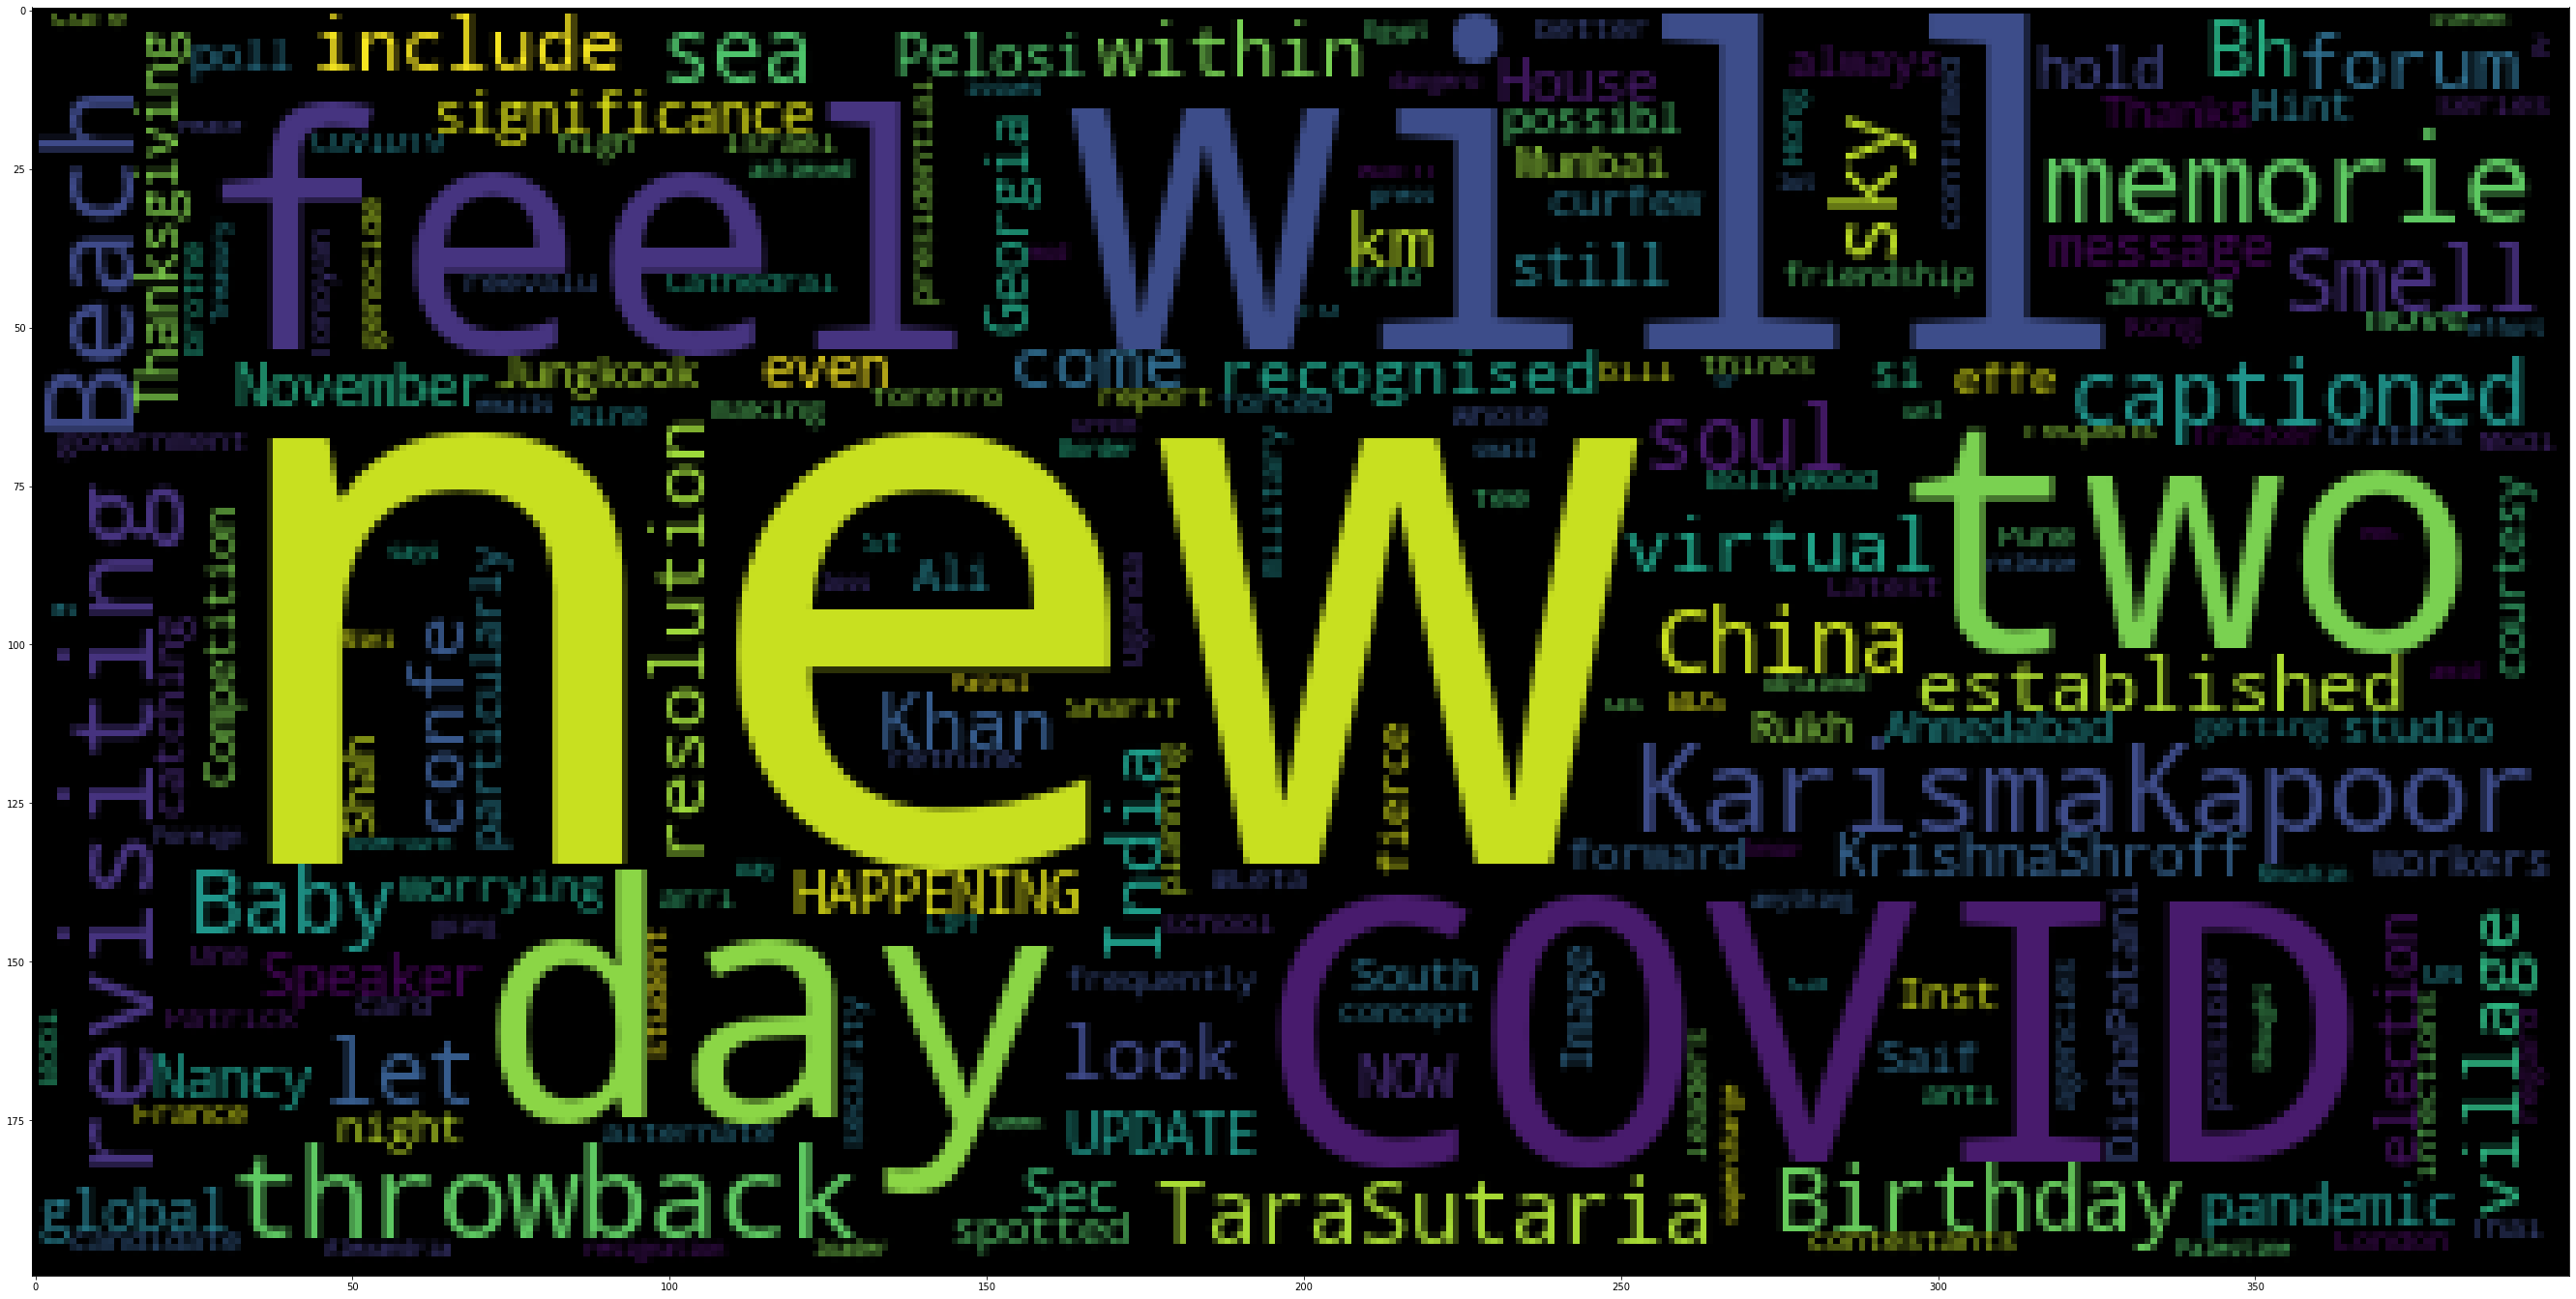

In [85]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud 
cloud = WordCloud().generate(str(df['Message']))
fig=plt.figure(figsize=(47,47))
plt.imshow(cloud)

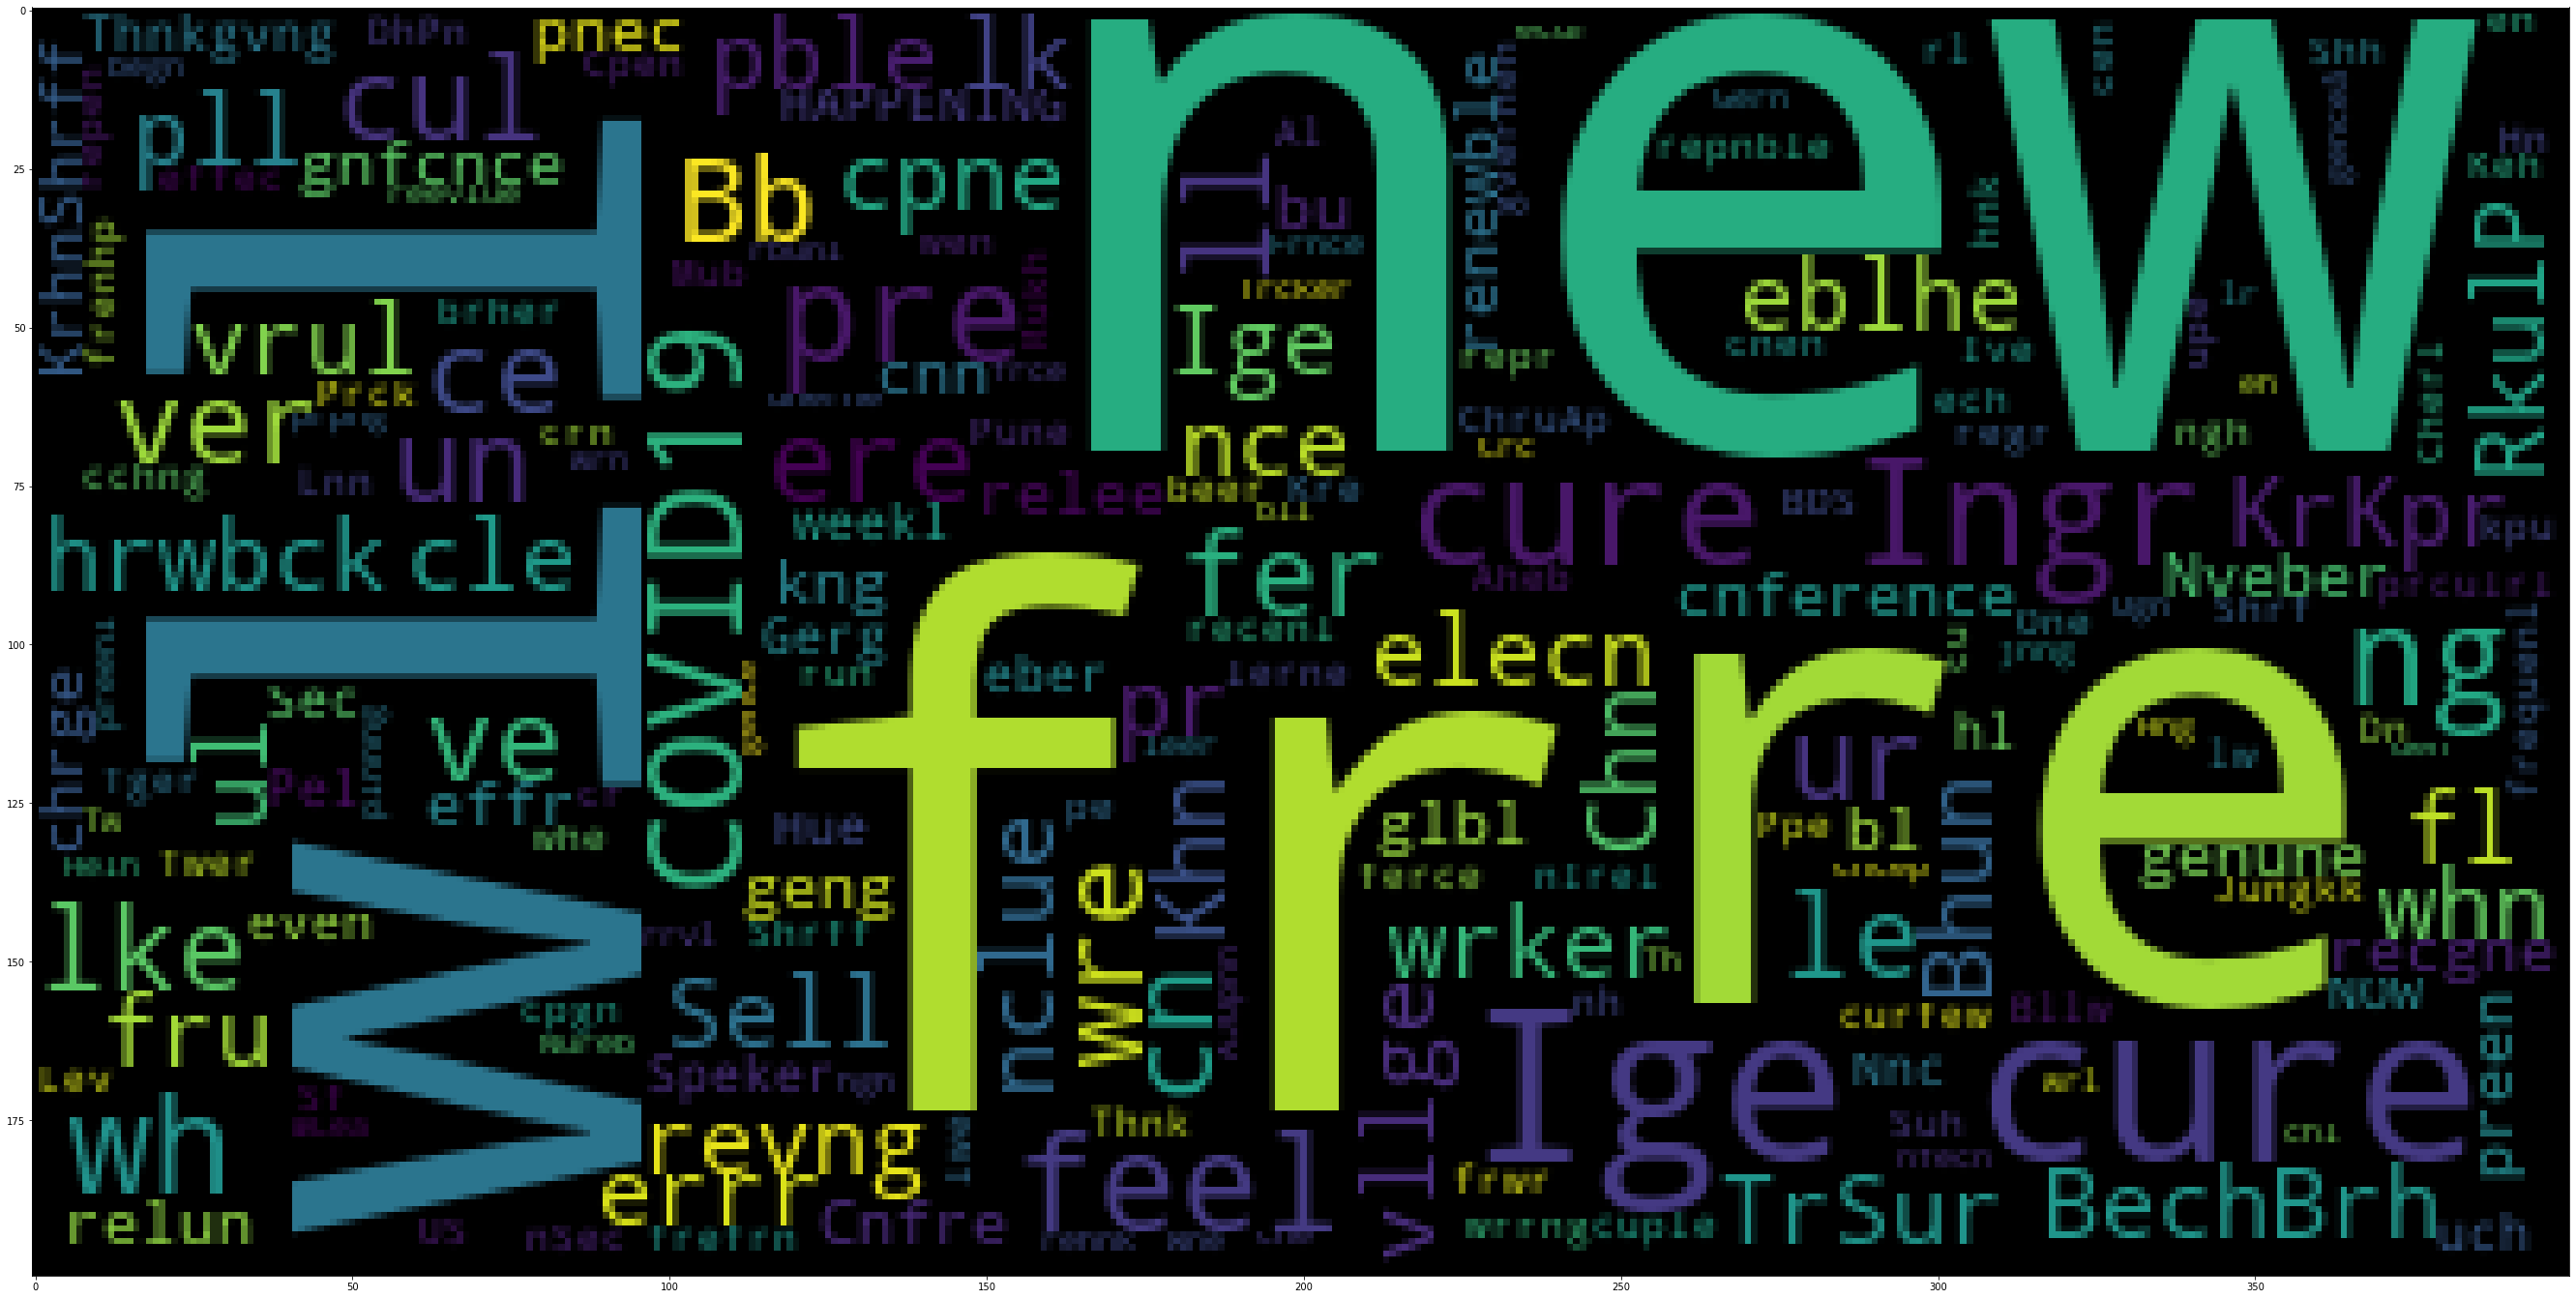

In [86]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud 
cloud = WordCloud().generate(str(df['msg_lemmatize']))
fig=plt.figure(figsize=(47,47))
plt.imshow(cloud)